# SQL for Data Science

## Module 4 Project 1 ~ Connecting to SQLite DB

In [ ]:
### CONNECT TO DATABASE

import sqlite3

db_path = r'C:\\Users\\Justin King\AppData\\Roaming\\DBeaverData\\workspace6\\.metadata\\databases\\db_sandbox.db'

connection = sqlite3.connect(db_path)

cursor_obj = connection.cursor()

In [12]:
# Drop the table if already exists.
cursor_obj.execute("DROP TABLE IF EXISTS instructors")



In [13]:
# Creating table
table = """ create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));"""
 
cursor_obj.execute(table)
 
print("Table is Ready")

Table is Ready


In [ ]:
cursor_obj.execute('''insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')''')
cursor_obj.execute('''insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')''')

In [21]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

All the data
(1, 'Rav', 'Ahuja', 'MOOSETOWN', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')


In [18]:
## Fetch few rows from the table
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
# If you want to fetch few rows from the table we use fetchmany(numberofrows) and mention the number how many rows you want to fetch
output_many = cursor_obj.fetchmany(2) 
for row_many in output_many:
  print(row_many)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


In [19]:
# Fetch only FNAME from the table
statement = '''SELECT FNAME FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
output_column = cursor_obj.fetchall()
for fetch in output_column:
  print(fetch)

All the data
('Rav',)
('Raul',)
('Hima',)


In [20]:
query_update='''update INSTRUCTOR set CITY='MOOSETOWN' where FNAME="Rav"'''
cursor_obj.execute(query_update)

In [24]:
import pandas as pd
#retrieve the query results into a pandas dataframe
df = pd.read_sql_query("select * from instructor;", connection)

#print the dataframe
print(df)
print(df.LNAME[0])
print(df.shape)

   ID FNAME      LNAME       CITY CCODE
0   1   Rav      Ahuja  MOOSETOWN    CA
1   2  Raul      Chong    Markham    CA
2   3  Hima  Vasudevan    Chicago    US
Ahuja
(3, 5)


In [25]:
connection.close()

## Module 4 Project 2 ~ SQL Magic

In [2]:
# LOAD SQL Magic
%load_ext sql

In [ ]:
%cd C:\Users\Justin King\AppData\Roaming\DBeaverData\workspace6\.metadata\databases
%ls
%sql sqlite:///db_sandbox.db


C:\Users\Justin King\AppData\Roaming\DBeaverData\workspace6\.metadata\databases
 Volume in drive C is OS
 Volume Serial Number is C474-14A7

 Directory of C:\Users\Justin King\AppData\Roaming\DBeaverData\workspace6\.metadata\databases

10/06/2025  09:56 PM    <DIR>          .
10/05/2025  10:56 PM    <DIR>          ..
10/06/2025  09:56 PM            12,288 db_sandbox.db
               1 File(s)         12,288 bytes
               2 Dir(s)  74,018,467,840 bytes free


In [13]:
%sql SELECT firstname from instructors


 * sqlite:///db_sandbox.db
Done.


KeyError: 'DEFAULT'

## Module 4 Project 3 ~ Analyzing a Real World Data Problem

In [26]:
import seaborn as sns
import pandas as pd
import sqlite3
conn = sqlite3.connect('socioeconomic.db')
%reload_ext sql
%sql sqlite:///socioeconomic.db socio


(sqlite3.OperationalError) near "socio": syntax error
[SQL: socio]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:

df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", conn, if_exists='replace', index=False,method="multi")


 Volume in drive C is OS
 Volume Serial Number is C474-14A7

 Directory of C:\Users\Justin King\AppData\Roaming\DBeaverData\workspace6\.metadata\databases

10/06/2025  10:22 PM    <DIR>          .
10/05/2025  10:56 PM    <DIR>          ..
10/06/2025  09:56 PM            12,288 db_sandbox.db
10/06/2025  10:22 PM            16,384 socioeconomic.db
               2 File(s)         28,672 bytes
               2 Dir(s)  74,097,872,896 bytes free


In [17]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [28]:
%sql SELECT * FROM sqlite_master

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


type,name,tbl_name,rootpage,sql
table,chicago_socioeconomic_data,chicago_socioeconomic_data,2,"CREATE TABLE ""chicago_socioeconomic_data"" (""ca"" REAL, ""community_area_name"" TEXT, ""percent_of_housing_crowded"" REAL, ""percent_households_below_poverty"" REAL, ""percent_aged_16_unemployed"" REAL, ""percent_aged_25_without_high_school_diploma"" REAL, ""percent_aged_under_18_or_over_64"" REAL, ""per_capita_income_"" INTEGER, ""hardship_index"" REAL)"


In [30]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [31]:
%sql SELECT COUNT(*) FROM CHICAGO_SOCIOECONOMIC_DATA

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [32]:
%sql SELECT COUNT(*) FROM CHICAGO_SOCIOECONOMIC_DATA WHERE HARDSHIP_INDEX > 50.0

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [33]:
%sql SELECT MAX(HARDSHIP_INDEX) FROM CHICAGO_SOCIOECONOMIC_DATA

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


MAX(HARDSHIP_INDEX)
98.0


In [36]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data )

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [38]:
%sql select * from chicago_socioeconomic_data where per_capita_income_ > 60000

   sqlite:///db_sandbox.db
 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


## Module 4 Project 4 ~ More SQL Magic

In [40]:

import csv, sqlite3

con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [43]:
%sql sqlite:///SQLiteMagic.db

In [44]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * sqlite:///SQLiteMagic.db
   sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.
99 rows affected.


[]

In [45]:
# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

In [46]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * sqlite:///SQLiteMagic.db
   sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [47]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite:///SQLiteMagic.db
   sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


Test_Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


       Test_Score  Frequency
count   19.000000  19.000000
mean    49.789474   5.210526
std      6.178628   3.660282
min     38.000000   1.000000
25%     45.500000   2.000000
50%     50.000000   4.000000
75%     54.500000   8.000000
max     60.000000  14.000000


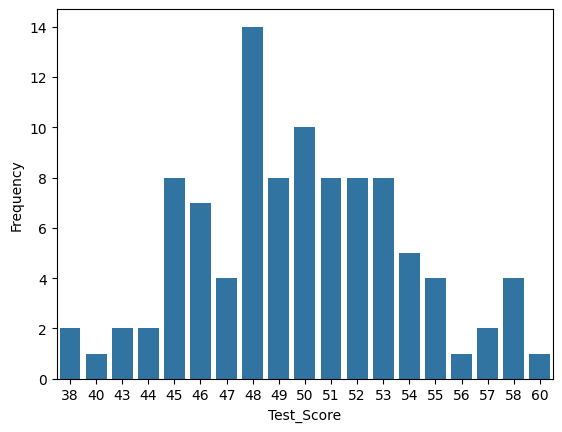

In [52]:
dataframe = test_score_distribution.DataFrame()
print(dataframe.describe())

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn==0.9.0
import seaborn

plot = seaborn.barplot(x='Test_Score',y='Frequency', data=dataframe)

In [53]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES limit 5;    

 * sqlite:///SQLiteMagic.db
   sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46


## Module 4 Project 5 ~ Real World Example

In [168]:
%sql sqlite:///db_sandbox.db

In [169]:
%sql SELECT * FROM ChicagoPublicSchools LIMIT 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99,Very Strong,99,Strong,74,Strong,66,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54,Strong,66,Strong,74,Very Strong,84,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610185.pdf,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61,NDA,NDA,Average,50,Weak,36,Weak,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.74711093,-87.73170248,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_609993.pdf,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56,Average,44,Average,45,Weak,37,Weak,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,N

In [170]:
%sql SELECT * FROM sqlite_master

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


type,name,tbl_name,rootpage,sql
table,INSTRUCTOR,INSTRUCTOR,2,"CREATE TABLE INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"
table,instructors,instructors,3,"CREATE TABLE instructors ( ins_id int not null, lastname varchar(50), firstname varchar(50), city varchar(50), country varchar(5) )"
table,ChicagoPublicSchools,ChicagoPublicSchools,4,"CREATE TABLE ChicagoPublicSchools ( School_ID INTEGER, NAME_OF_SCHOOL VARCHAR(64), ""Elementary, Middle, or High School"" VARCHAR(50), Street_Address NVARCHAR(50), City VARCHAR(50), State VARCHAR(50), ZIP_Code INTEGER, Phone_Number NVARCHAR(50), Link VARCHAR(128), Network_Manager VARCHAR(50), Collaborative_Name VARCHAR(50), Adequate_Yearly_Progress_Made_ VARCHAR(50), Track_Schedule VARCHAR(50), CPS_Performance_Policy_Status VARCHAR(50), CPS_Performance_Policy_Level VARCHAR(50), HEALTHY_SCHOOL_CERTIFIED VARCHAR(50), Safety_Icon VARCHAR(50), SAFETY_SCORE INTEGER, Family_Involvement_Icon VARCHAR(50), Family_Involvement_Score VARCHAR(50), Environment_Icon VARCHAR(50), Environment_Score INTEGER, Instruction_Icon VARCHAR(50), Instruction_Score INTEGER, Leaders_Icon VARCHAR(50), Leaders_Score VARCHAR(50), Teachers_Icon VARCHAR(50), Teachers_Score VARCHAR(50), Parent_Engagement_Icon VARCHAR(50), Parent_Engagement_Score VARCHAR(50), Parent_Environment_Icon VARCHAR(50), Parent_Environment_Score VARCHAR(50), AVERAGE_STUDENT_ATTENDANCE NVARCHAR(50), Rate_of_Misconducts__per_100_students_ REAL, Average_Teacher_Attendance NVARCHAR(50), Individualized_Education_Program_Compliance_Rate NVARCHAR(50), Pk_2_Literacy__ VARCHAR(50), Pk_2_Math__ VARCHAR(50), Gr3_5_Grade_Level_Math__ VARCHAR(50), Gr3_5_Grade_Level_Read__ VARCHAR(50), Gr3_5_Keep_Pace_Read__ VARCHAR(50), Gr3_5_Keep_Pace_Math__ VARCHAR(50), Gr6_8_Grade_Level_Math__ VARCHAR(50), Gr6_8_Grade_Level_Read__ VARCHAR(50), Gr6_8_Keep_Pace_Math_ VARCHAR(50), Gr6_8_Keep_Pace_Read__ VARCHAR(50), Gr_8_Explore_Math__ VARCHAR(50), Gr_8_Explore_Read__ VARCHAR(50), ISAT_Exceeding_Math__ REAL, ISAT_Exceeding_Reading__ REAL, ISAT_Value_Add_Math REAL, ISAT_Value_Add_Read REAL, ISAT_Value_Add_Color_Math VARCHAR(50), ISAT_Value_Add_Color_Read VARCHAR(50), Students_Taking__Algebra__ VARCHAR(50), Students_Passing__Algebra__ VARCHAR(50), ""9th Grade EXPLORE (2009)"" VARCHAR(50), ""9th Grade EXPLORE (2010)"" VARCHAR(50), ""10th Grade PLAN (2009)"" VARCHAR(50), ""10th Grade PLAN (2010)"" VARCHAR(50), Net_Change_EXPLORE_and_PLAN VARCHAR(50), ""11th Grade Average ACT (2011)"" VARCHAR(50), Net_Change_PLAN_and_ACT VARCHAR(50), College_Eligibility__ VARCHAR(50), Graduation_Rate__ VARCHAR(50), College_Enrollment_Rate__ VARCHAR(50), COLLEGE_ENROLLMENT INTEGER, General_Services_Route INTEGER, Freshman_on_Track_Rate__ VARCHAR(50), X_COORDINATE REAL, Y_COORDINATE REAL, Latitude REAL, Longitude REAL, COMMUNITY_AREA_NUMBER INTEGER, COMMUNITY_AREA_NAME VARCHAR(50), Ward INTEGER, Police_District INTEGER, Location NVARCHAR(50) )"
table,SocioeconomicChicago,SocioeconomicChicago,100,"CREATE TABLE ""SocioeconomicChicago"" (""COMMUNITY_AREA_NUMBER"" REAL, ""COMMUNITY_AREA_NAME"" TEXT, ""PERCENT_OF_HOUSING_CROWDED"" REAL, ""PERCENT_HOUSEHOLDS_BELOW_POVERTY"" REAL, ""PERCENT_AGED_16__UNEMPLOYED"" REAL, ""PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA"" REAL, ""PERCENT_AGED_UNDER_18_OR_OVER_64"" REAL, ""PER_CAPITA_INCOME"" INTEGER, ""HARDSHIP_INDEX"" REAL)"
table,ChicagoCrimeData,ChicagoCrimeData,103,"CREATE TABLE ChicagoCrimeData ( ID INTEGER, CASE_NUMBER VARCHAR(50), DATE NVARCHAR(50), BLOCK NVARCHAR(50), IUCR INTEGER, PRIMARY_TYPE VARCHAR(50), DESCRIPTION VARCHAR(50), LOCATION_DESCRIPTION VARCHAR(50), ARREST BOOLEAN, DOMESTIC BOOLEAN, BEAT INTEGER, DISTRICT INTEGER, WARD INTEGER, COMMUNITY_AREA_NUMBER INTEGER, FBICODE INTEGER, X_COORDINATE INTEGER, Y_COORDINATE INTEGER, ""YEAR"" INTEGER, LATITUDE REAL, LONGITUDE REAL, LOCATION NVARCHAR(50) )"


In [190]:
%sql SELECT COUNT(*) FROM ChicagoPublicSchools 

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


COUNT(*)
566


In [172]:
%sql SELECT count(name) FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools');

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


count(name)
78


In [173]:
%sql SELECT name, type, length(type) FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools') limit 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name,type,length(type)
School_ID,INTEGER,7
NAME_OF_SCHOOL,VARCHAR(64),11
"Elementary, Middle, or High School",VARCHAR(50),11
Street_Address,NVARCHAR(50),12
City,VARCHAR(50),11


In [174]:
%sql SELECT name FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools') where LOWER(name) like '%elementary%'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name
"Elementary, Middle, or High School"


In [175]:
%sql select count(*) from chicagopublicschools where `Elementary, Middle, or High School` = 'ES'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


count(*)
462


In [176]:
%sql SELECT name FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools') where LOWER(name) like '%safety%'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name
Safety_Icon
SAFETY_SCORE


In [177]:
%sql select max(SAFETY_SCORE) from chicagopublicschools 

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


max(SAFETY_SCORE)
""


In [178]:
%sql SELECT name FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools') where LOWER(name) like '%ATTENDANCE%'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name
AVERAGE_STUDENT_ATTENDANCE
Average_Teacher_Attendance


In [179]:
%sql select NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE from chicagopublicschools ORDER BY AVERAGE_STUDENT_ATTENDANCE DESC LIMIT 10

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,AVERAGE_STUDENT_ATTENDANCE
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


In [180]:
%sql select NAME_OF_SCHOOL, REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%', '') AS AVG_ATTENDENCE from chicagopublicschools WHERE AVERAGE_STUDENT_ATTENDANCE != ''  ORDER BY AVERAGE_STUDENT_ATTENDANCE LIMIT 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,AVG_ATTENDENCE
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


In [181]:
%sql select NAME_OF_SCHOOL, CAST(REPLACE(AVERAGE_STUDENT_ATTENDANCE, '%', '') AS FLOAT) AS AVG_ATTENDENCE from chicagopublicschools WHERE AVG_ATTENDENCE < 70.00 ORDER BY AVERAGE_STUDENT_ATTENDANCE LIMIT 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,AVG_ATTENDENCE
Velma F Thomas Early Childhood Center,0.0
Richard T Crane Technical Preparatory High School,57.9
Barbara Vick Early Childhood & Family Center,60.9
Dyett High School,62.5
Wendell Phillips Academy High School,63.0


In [182]:
%sql SELECT name FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools') where LOWER(name) like '%community%'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name
COMMUNITY_AREA_NUMBER
COMMUNITY_AREA_NAME


In [183]:
%sql select COMMUNITY_AREA_NAME, SUM(COLLEGE_ENROLLMENT) as TOTAL_COLL_ENROLLMENT from chicagopublicschools group BY COMMUNITY_AREA_NAME ORDER BY TOTAL_COLL_ENROLLMENT LIMIT 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NAME,TOTAL_COLL_ENROLLMENT
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


In [184]:
%sql SELECT name FROM PRAGMA_TABLE_INFO('ChicagoPublicSchools') where LOWER(name) like '%name%'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name
NAME_OF_SCHOOL
Collaborative_Name
COMMUNITY_AREA_NAME


In [185]:
%sql select NAME_OF_SCHOOL, SAFETY_SCORE from chicagopublicschools ORDER BY SAFETY_SCORE LIMIT 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


NAME_OF_SCHOOL,SAFETY_SCORE
Edmond Burke Elementary School,1
Luke O'Toole Elementary School,5
George W Tilton Elementary School,6
Foster Park Elementary School,11
Emil G Hirsch Metropolitan High School,13


In [186]:
con = sqlite3.connect('db_sandbox.db')
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")


78

In [187]:
%sql SELECT name FROM PRAGMA_TABLE_INFO('CENSUS_DATA') WHERE name like '%hardship%'

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


name
HARDSHIP_INDEX


In [188]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA LIMIT 5

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NAME
Rogers Park
West Ridge
Uptown
Lincoln Square
North Center


In [189]:
%%sql 
SELECT 
    SUM(school.COLLEGE_ENROLLMENT) as TOTAL_COLL_ENROLLMENT,
    school.COMMUNITY_AREA_NAME,
    census.HARDSHIP_INDEX
FROM ChicagoPublicSchools school
INNER JOIN CENSUS_DATA census ON 
    census.COMMUNITY_AREA_NUMBER = school.COMMUNITY_AREA_NUMBER
GROUP BY school.COMMUNITY_AREA_NAME
ORDER BY TOTAL_COLL_ENROLLMENT DESC
LIMIT 1

   sqlite:///SQLiteMagic.db
 * sqlite:///db_sandbox.db
   sqlite:///socioeconomic.db
Done.


TOTAL_COLL_ENROLLMENT,COMMUNITY_AREA_NAME,HARDSHIP_INDEX
14793,SOUTH LAWNDALE,96.0
